# <font color='purple'> 기본과제 분석 보고서_종합

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
#Configure Defaults
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family']='Malgun Gothic'
import missingno as msno
from tqdm import tqdm_notebook

# 제 2절  현황분석
# 1. 자료 수집
### Dataset from 1399 
#### <font color='red'> (alert) <font> data 폴더를 1399_data로 rename

## 1.1 데이터 읽어 저장하고 확인 하기
2019년도 데이터를 엑셀 불러 들여 컬럼 수와 내용 확인

In [32]:
row_sum = 0
df=pd.DataFrame()

for file in ['1399_2015년', '1399_2016년', '1399_2017년', '1399_2018년', '1399_2019년'] :
    file_name = '../1399_data/' + file + '.xlsx'
    pd.read_excel(file_name).shape
    pd.read_excel(file_name).columns
    df = df.append(pd.read_excel(file_name))
    row_sum = row_sum + df.shape[0]
    
row_sum    
df.shape

(9744, 63)

Index(['문서번호', '신고일시', '현재 처리부서', '종결일시', '최종처리단계입력일시', '최종처리단계', '처리기간',
       '접수경로', '접수처', '최초이첩자', '소비단계 조사기관', '소비단계 입력일시', '유통단계조사기관',
       '유통단계 입력일시', '제조단계 조사기관', '제조단계 입력일시', '이물보고외 조사기관', '신고분류', '신고소분류',
       '신고내용', '제품명', '식품유형', 'HACCP', '신고내용(내용기재) 200자', '제조원', '제조원업종',
       '제조원 연락처', '제조원 소재지', '판매원', '판매원업종', '판매원 연락처', '판매원 소재지', '유통기한(일)',
       '포장단위', '원산지', '제품구입장소', '제품구입일', '제품개봉일', '이물발견일', '보관기준', '클레임 접수일',
       '소비자 성명', '소비자 연락처', '소비자 주소', '진행상태', '조사결과(접수원본) 200자', '행정처분',
       '행정처분상세', '행정처분일자', '포상금', '포상금지급대상여부', '이물검출코드', '이물검출명', '이물검출기타',
       '조사일시', '조사기한', '조사결과(이물보고)', '조사종결내용', '등록ID', '내부고발여부', '접객업여부',
       '조사결과', '처분상세'],
      dtype='object')

(10355, 63)

Index(['문서번호', '신고일시', '현재 처리부서', '종결일시', '최종처리단계입력일시', '최종처리단계', '처리기간',
       '접수경로', '접수처', '최초이첩자', '소비단계 조사기관', '소비단계 입력일시', '유통단계조사기관',
       '유통단계 입력일시', '제조단계 조사기관', '제조단계 입력일시', '이물보고외 조사기관', '신고분류', '신고소분류',
       '신고내용', '제품명', '식품유형', 'HACCP', '신고내용(내용기재) 200자', '제조원', '제조원업종',
       '제조원 연락처', '제조원 소재지', '판매원', '판매원업종', '판매원 연락처', '판매원 소재지', '유통기한(일)',
       '포장단위', '원산지', '제품구입장소', '제품구입일', '제품개봉일', '이물발견일', '보관기준', '클레임 접수일',
       '소비자 성명', '소비자 연락처', '소비자 주소', '진행상태', '조사결과(접수원본) 200자', '행정처분',
       '행정처분상세', '행정처분일자', '포상금', '포상금지급대상여부', '이물검출코드', '이물검출명', '이물검출기타',
       '조사일시', '조사기한', '조사결과(이물보고)', '조사종결내용', '등록ID', '내부고발여부', '접객업여부',
       '조사결과', '처분상세'],
      dtype='object')

(10675, 63)

Index(['문서번호', '신고일시', '현재 처리부서', '종결일시', '최종처리단계입력일시', '최종처리단계', '처리기간',
       '접수경로', '접수처', '최초이첩자', '소비단계 조사기관', '소비단계 입력일시', '유통단계조사기관',
       '유통단계 입력일시', '제조단계 조사기관', '제조단계 입력일시', '이물보고외 조사기관', '신고분류', '신고소분류',
       '신고내용', '제품명', '식품유형', 'HACCP', '신고내용(내용기재) 200자', '제조원', '제조원업종',
       '제조원 연락처', '제조원 소재지', '판매원', '판매원업종', '판매원 연락처', '판매원 소재지', '유통기한(일)',
       '포장단위', '원산지', '제품구입장소', '제품구입일', '제품개봉일', '이물발견일', '보관기준', '클레임 접수일',
       '소비자 성명', '소비자 연락처', '소비자 주소', '진행상태', '조사결과(접수원본) 200자', '행정처분',
       '행정처분상세', '행정처분일자', '포상금', '포상금지급대상여부', '이물검출코드', '이물검출명', '이물검출기타',
       '조사일시', '조사기한', '조사결과(이물보고)', '조사종결내용', '등록ID', '내부고발여부', '접객업여부',
       '조사결과', '처분상세'],
      dtype='object')

(10934, 63)

Index(['문서번호', '신고일시', '현재 처리부서', '종결일시', '최종처리단계입력일시', '최종처리단계', '처리기간',
       '접수경로', '접수처', '최초이첩자', '소비단계 조사기관', '소비단계 입력일시', '유통단계조사기관',
       '유통단계 입력일시', '제조단계 조사기관', '제조단계 입력일시', '이물보고외 조사기관', '신고분류', '신고소분류',
       '신고내용', '제품명', '식품유형', 'HACCP', '신고내용(내용기재) 200자', '제조원', '제조원업종',
       '제조원 연락처', '제조원 소재지', '판매원', '판매원업종', '판매원 연락처', '판매원 소재지', '유통기한(일)',
       '포장단위', '원산지', '제품구입장소', '제품구입일', '제품개봉일', '이물발견일', '보관기준', '클레임 접수일',
       '소비자 성명', '소비자 연락처', '소비자 주소', '진행상태', '조사결과(접수원본) 200자', '행정처분',
       '행정처분상세', '행정처분일자', '포상금', '포상금지급대상여부', '이물검출코드', '이물검출명', '이물검출기타',
       '조사일시', '조사기한', '조사결과(이물보고)', '조사종결내용', '등록ID', '내부고발여부', '접객업여부',
       '조사결과', '처분상세'],
      dtype='object')

(11176, 63)

Index(['문서번호', '신고일시', '현재 처리부서', '종결일시', '최종처리단계입력일시', '최종처리단계', '처리기간',
       '접수경로', '접수처', '최초이첩자', '소비단계 조사기관', '소비단계 입력일시', '유통단계조사기관',
       '유통단계 입력일시', '제조단계 조사기관', '제조단계 입력일시', '이물보고외 조사기관', '신고분류', '신고소분류',
       '신고내용', '제품명', '식품유형', 'HACCP', '신고내용(내용기재) 200자', '제조원', '제조원업종',
       '제조원 연락처', '제조원 소재지', '판매원', '판매원업종', '판매원 연락처', '판매원 소재지', '유통기한(일)',
       '포장단위', '원산지', '제품구입장소', '제품구입일', '제품개봉일', '이물발견일', '보관기준', '클레임 접수일',
       '소비자 성명', '소비자 연락처', '소비자 주소', '진행상태', '조사결과(접수원본) 200자', '행정처분',
       '행정처분상세', '행정처분일자', '포상금', '포상금지급대상여부', '이물검출코드', '이물검출명', '이물검출기타',
       '조사일시', '조사기한', '조사결과(이물보고)', '조사종결내용', '등록ID', '내부고발여부', '접객업여부',
       '조사결과', '처분상세'],
      dtype='object')

155209

(52884, 63)

In [33]:
df.columns

Index(['문서번호', '신고일시', '현재 처리부서', '종결일시', '최종처리단계입력일시', '최종처리단계', '처리기간',
       '접수경로', '접수처', '최초이첩자', '소비단계 조사기관', '소비단계 입력일시', '유통단계조사기관',
       '유통단계 입력일시', '제조단계 조사기관', '제조단계 입력일시', '이물보고외 조사기관', '신고분류', '신고소분류',
       '신고내용', '제품명', '식품유형', 'HACCP', '신고내용(내용기재) 200자', '제조원', '제조원업종',
       '제조원 연락처', '제조원 소재지', '판매원', '판매원업종', '판매원 연락처', '판매원 소재지', '유통기한(일)',
       '포장단위', '원산지', '제품구입장소', '제품구입일', '제품개봉일', '이물발견일', '보관기준', '클레임 접수일',
       '소비자 성명', '소비자 연락처', '소비자 주소', '진행상태', '조사결과(접수원본) 200자', '행정처분',
       '행정처분상세', '행정처분일자', '포상금', '포상금지급대상여부', '이물검출코드', '이물검출명', '이물검출기타',
       '조사일시', '조사기한', '조사결과(이물보고)', '조사종결내용', '등록ID', '내부고발여부', '접객업여부',
       '조사결과', '처분상세'],
      dtype='object')

In [34]:
def summary(df) :
    pd.set_option('display.max_rows', 100)
    tf = pd.DataFrame({'데이터형태(dtypes)' : df.dtypes, 
                        '비 결측치 수(notnull' : df.notnull().sum(),
                        '결측치 수(null)' : df.isnull().sum(), 
                        '고유값 수(nunique)' : df.nunique()})
    return tf

tf = summary(df)
tf.reset_index(inplace = True) # 인덱스를 컬럼명으로 바꾸어 데이터에 적용
tf.head()

# 2월 24일 기준 컬럼분류
pd.read_excel('../1399_data/1399_15-19년(20.2.24 기준)_summary.xlsx').head()

tf = tf.merge(pd.read_excel('../1399_data/1399_15-19년(20.2.24 기준)_summary.xlsx')[['컬럼', '필요여부']],
         left_on ='index', right_on ='컬럼', how ='left')

tf['필요여부_new'] = 0
tf.to_excel('../1399_output/1399_15-19년(20.3.10 기준)_필요컬럼_후보.xlsx')
tf.head()

### 1399에서 확정한 필요한 컬럼만 가져오기

In [35]:
tf = pd.read_excel('../1399_data/1399_15-19년(20.3.10 기준)_필요컬럼.xlsx')
necessary_columns = tf.loc[tf['필요여부'] == 1, '컬럼'].to_list()
','.join(necessary_columns)
df = df[necessary_columns]

'내부고발여부,문서번호,소비자 성명,소비자 주소,식품유형,신고내용,신고내용(내용기재) 200자,신고분류,신고소분류,신고일시,이물검출기타,이물검출명,이물검출코드,제조원,제조원 소재지,제조원업종,제품구입장소,제품명,조사결과(이물보고),조사결과(접수원본) 200자,조사종결내용,종결일시,진행상태,처리기간,행정처분,현재 처리부서'

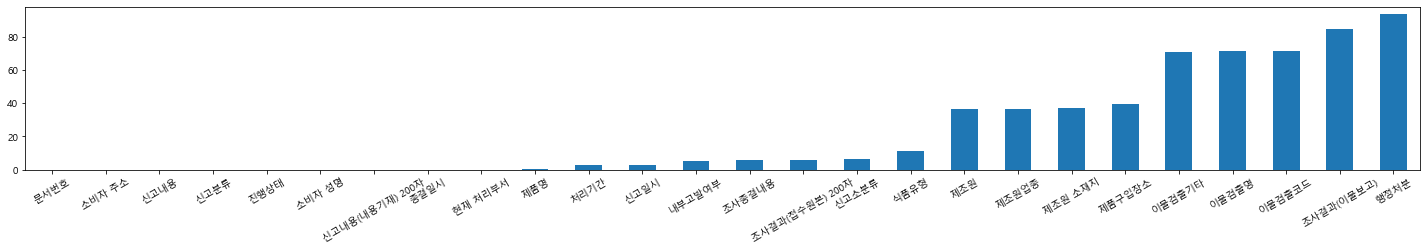

In [36]:
null_percent = df.isnull().sum()*100/len(df)
null_percent.sort_values().plot(kind='bar', rot='30', figsize=(25,3))

식품        0.746785
축산물       0.117881
기타        0.065918
수입        0.042603
주류        0.015619
건강기능식품    0.011194
Name: 신고분류, dtype: float64

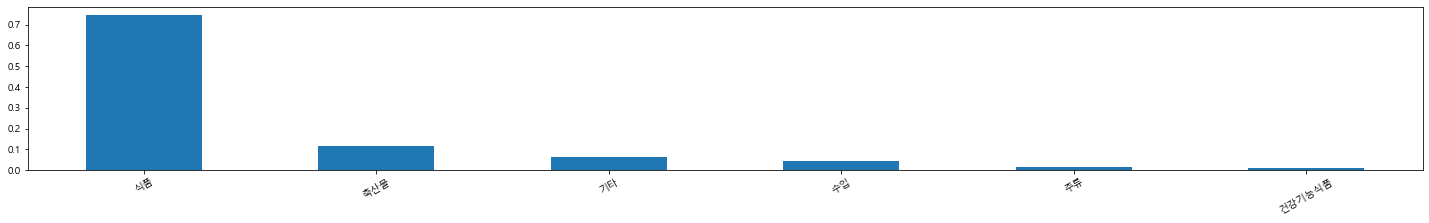

In [37]:
df.신고분류.value_counts(normalize=True)
df.신고분류.value_counts(normalize=True).plot(kind='bar', rot='30', figsize=(25,3))

### <font color ='red'> a. 식품유형 컬럼의 값을 mapping table(식품유형분류표)를 사용하여 공전의 식품유형으로 바꾸기

In [38]:
df['식품유형'].value_counts()

조리식품 등    12709
과자         2405
빵류         1282
기타         1128
기타가공품      1034
          ...  
식용유지류         1
낙지신선냉장        1
구기자건조         1
조미식품          1
줄풀            1
Name: 식품유형, Length: 865, dtype: int64

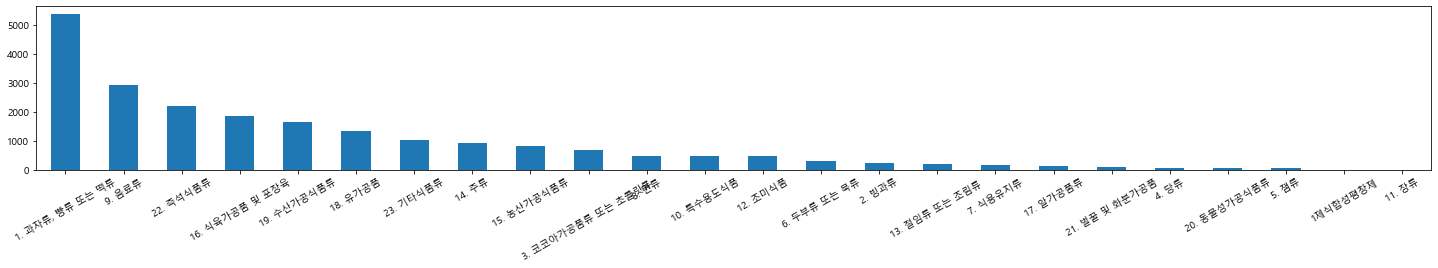

In [39]:
tf = pd.read_excel('../1399_data/식품유형_분류표.xlsx')
foodtype_mapping = dict(zip(tf.식품유형, tf.대분류))  # old와 new로 pair
df['식품유형'] = df['식품유형'].apply(lambda x: foodtype_mapping[x] if x in foodtype_mapping.keys() else x)
df['식품유형'].value_counts().plot(kind='bar', rot ='30', figsize=(25,3))

### <font color ='red'> b. 조사 결과 유형 

In [40]:
df['조사결과(접수원본) 200자'][3]
df['조사결과(접수원본) 200자'][6]
df['조사결과(접수원본) 200자'][30]

3    · 사실 여부를 조사 하고자 동 장소에 출장, 유통기한이 경과된 롯데 아몬드빼빼로를...
3    1. 귀 가정의 평안이 가득하기를 기원합니다.\n\n2. 귀하께서 제기하신 사항과 ...
3                                                  NaN
3    1. 평소 식품안전에 관심을 가져주셔셔 깊이 감사드립니다. \n\n2. 귀하께서 ㈜...
3    - 민원인께 2019.1.7. 연락드려 수거 검사 실시한 결과 적합인 사실 안내해드...
Name: 조사결과(접수원본) 200자, dtype: object

6                                        소비자 자진취하 조사종결
6    1. 우리구 위생행정에 관심을 가져 주심에 감사 드립니다.\n2. 신고하신 사항에 ...
6    1. 식품안전에 대한 귀하의 관심에 감사드립니다.\n2. 귀하께서 주신 민원에 대하...
6    1. 식품안전에 대한 관심에 깊이 감사드립니다.\n2. 귀하께서 구입하신『무청시래기...
6    1. 파주시 시정발전에 관심을 가져주시는 귀하께 감사드립니다.\n\n\n2. 귀하께...
Name: 조사결과(접수원본) 200자, dtype: object

30                            허위과대광고 위반행위에 대해 행정처분 진행중임
30                                이물을 수거하지 못하여 조사종결 처리함
30          1. `사람이 먼저인 화성`의 식품위생정책에 대한 귀하의 관심에 감사드립...
30    1. 우리 처 식품안전소비자신고센터를 방문하여 주셔서 감사합니다.\n\n2. 귀하께...
30    1. 식품위생행정에 관심을 가지고 제보해 주셔서 감사합니다.\n2. 1월 4일(금)...
Name: 조사결과(접수원본) 200자, dtype: object

조사결과(이물보고)         0.153336
조사결과(접수원본) 200자    0.940360
조사종결내용             0.944293
dtype: float64

NaN                   0.935122
시정명령                  0.023731
과태료부과                 0.023504
시설개수명령                0.005427
영업정지                  0.004500
경고                    0.002817
품목제조정지                0.001702
영업정지 및 해당음식품폐기        0.001116
영업정지 및 해당제품폐기         0.000813
과징금                   0.000529
고발                    0.000303
품목류제조정지               0.000246
영업소폐쇄                 0.000076
영업허가·등록취소             0.000038
영업정지 및 해당제품 및 원료폐기    0.000038
등록취소                  0.000019
해당차량영업정지              0.000019
Name: 행정처분, dtype: float64

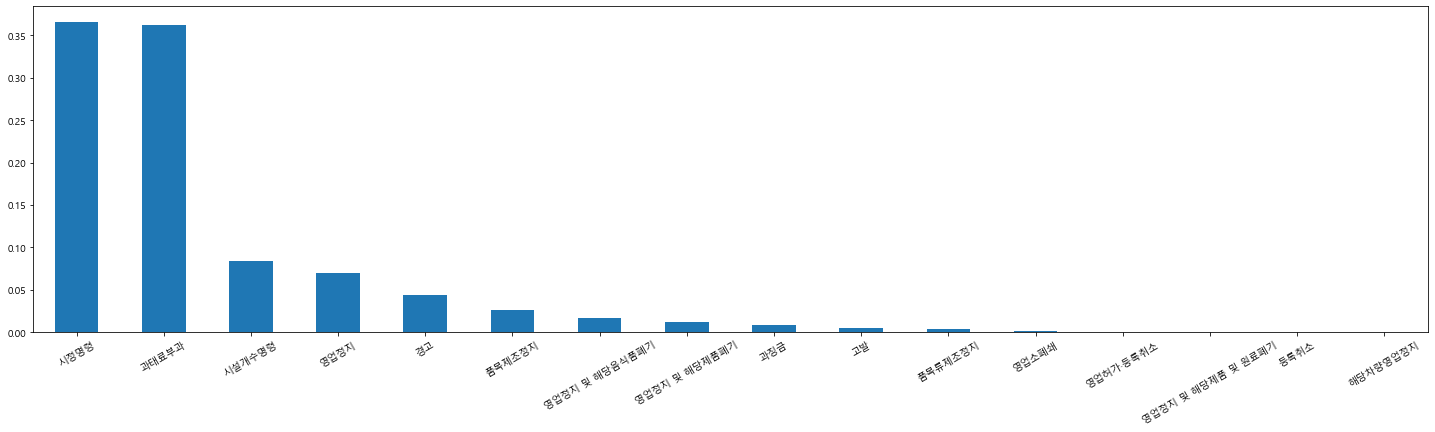

In [41]:
1- df[['조사결과(이물보고)', '조사결과(접수원본) 200자', '조사종결내용']].isnull().sum()/len(df)
df['행정처분'].value_counts(dropna=False) / len(df)
df['행정처분'].value_counts(normalize=True).plot(kind='bar', rot ='30', figsize=(25,6))

#### <font color ='purple'>Nan에 해당되는 조사결과를 변경하고 index를 serial번호로 

In [42]:
tf_행정처분 = df.행정처분 # 행정처분컬럼을 tf시리즈로 저장

In [43]:
import re
df['조사결과(접수원본) 200자'] = df['조사결과(접수원본) 200자'].fillna('조상')
df = df.reset_index()

In [44]:
keywords = pd.read_excel('../1399_data/조사결과분류_regex.xlsx')['검색어'].to_list()
','.join(keywords)

'시정명령,과태료,과징금,시설개수,경고,음식품폐기,제품폐기,원료폐기,품목정지,품목류정지,품목제조정지,품목류제조정지,영업정지,해당차량영업정지,영업허가취소,영업취소,허가취소,영업등록취소,등록취소,업체폐쇄,업소폐쇄,영업소폐쇄,폐쇄,형사고발,고발,적발조치,진행,진행중,취하,이첩,조사불가'

keywords = ['행정처분', '영업정지', '품목제조정지', '시정명령',
            '과태료', '형사고발', '행정지도', '미위반', '취하', '중복접수', '이첩', '조사불가']        

In [45]:
def food_type (search_text) :
    for i, text in enumerate(df['조사결과(접수원본) 200자']) :
        if search_text in regex.findall(text) :
            df.loc[i,search_text] = 1 # '1'대신 단어출현빈도인 len(regex.findall(text))

for search_text in tqdm_notebook(keywords) :
    regex=re.compile(search_text)
    df[search_text] = 0
    food_type (search_text)

In [46]:
tf = df[keywords]
tf['합계'] = tf.sum(axis=1)
tf.loc['년도별 합계'] = tf.sum()
tf.tail()

,시정명령,과태료,과징금,시설개수,경고,음식품폐기,제품폐기,원료폐기,품목정지,품목류정지,...,폐쇄,형사고발,고발,적발조치,진행,진행중,취하,이첩,조사불가,합계
52880,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52881,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52882,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
52883,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
년도별 합계,556,1898,19,25,498,0,10,0,5,0,...,76,111,692,7,5246,968,3089,1556,369,15444


#### <font color ='purple'> Max값을 찾아서 그것의 index를 출력하는 함수, 열이 아닌 행으로 연산하면 dummy가 다시 원래 변수가 됨

In [47]:
## 기존 행정처분 컬럼은 드래로 승계하여야 함, 그러지 못했음

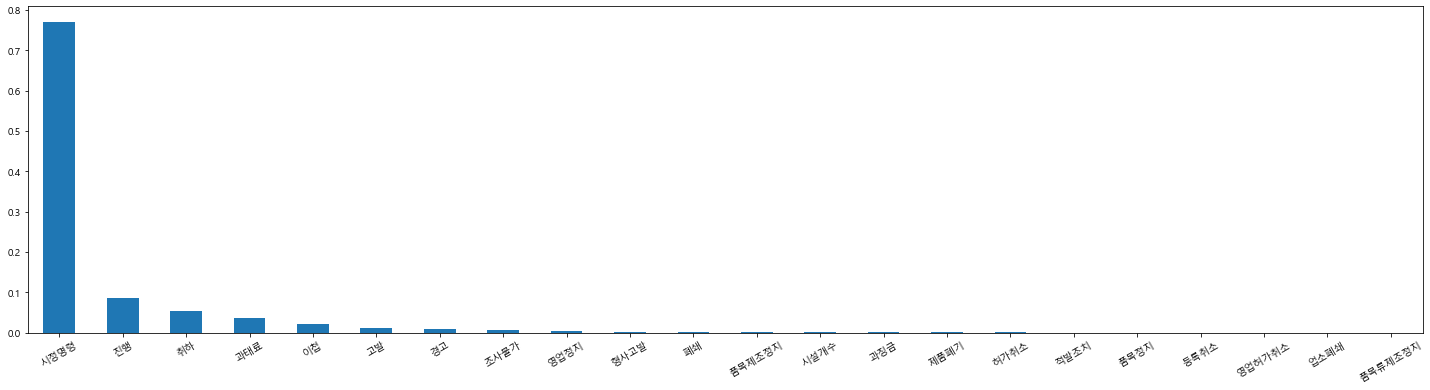

In [48]:
df['행정처분'] = df[keywords].idxmax(axis=1)
df['행정처분'].value_counts(normalize=True).plot(kind='bar', rot ='30', figsize=(25,6))

### <font color ='red'> c. 날짜 데이터 변경 및 년도, 월, 요일 생성

In [49]:
import datetime
import calendar
from datetime import datetime
df['신고일시'] = pd.to_datetime(df['신고일시'])
df['종결일시'] = pd.to_datetime(df['종결일시'])

df['년도']=df['신고일시'].apply(lambda x: x.year)
df['월']=df['신고일시'].apply(lambda x: x.month)
df['요일']=df['신고일시'].apply(lambda x: x.weekday())

today = datetime.now()
today

datetime.datetime(2020, 3, 11, 16, 31, 8, 923631)

### <font color ='red'> d. 시도 시군구 지역정보 생성

In [50]:
df['시도'] = df['제조원 소재지'].str.split(' ', 2, expand=True)[0]
df['시군구'] = df['제조원 소재지'].str.split(' ', 2, expand=True)[1]
df['소시도'] = df['소비자 주소'].str.split(' ', 2, expand=True)[0]
df['소시군구'] = df['소비자 주소'].str.split(' ', 2, expand=True)[1]
df['조시도'] = df['현재 처리부서'].str.split(' ', 2, expand=True)[0]
df['조시군구'] = df['현재 처리부서'].str.split(' ', 2, expand=True)[1]

In [51]:
df['시도'].value_counts(dropna=False)

NaN        19595
경기도         9559
서울특별시       4616
충청북도        2738
충청남도        2361
경상남도        2009
전라북도        1615
부산광역시       1610
강원도         1583
경상북도        1535
인천광역시       1262
전라남도        1165
대전광역시        827
대구광역시        811
광주광역시        622
세종특별자치시      418
제주특별자치도      322
울산광역시        225
경북             7
경기             1
인천             1
               1
서울             1
Name: 시도, dtype: int64

In [52]:
df['시도'] = df['시도'].replace({'경북': '경상북도', '경기': '경기도',  '서울': '서울특별시',  '인천': '인천광역시'})
#df['시도'].replace(['경북', '경기', '서울', '인천'], ['경상북도', '경기도', '서울특별시', '인천광역시'])

In [53]:
df['시도'].value_counts()

경기도        9560
서울특별시      4617
충청북도       2738
충청남도       2361
경상남도       2009
전라북도       1615
부산광역시      1610
강원도        1583
경상북도       1542
인천광역시      1263
전라남도       1165
대전광역시       827
대구광역시       811
광주광역시       622
세종특별자치시     418
제주특별자치도     322
울산광역시       225
              1
Name: 시도, dtype: int64

In [56]:
del df['index']

In [59]:
df.to_pickle('../1399_data/1399_dataset.pkl')

In [60]:
df = pd.read_pickle('../1399_data/1399_dataset.pkl')
df.head(3)

,내부고발여부,문서번호,소비자 성명,소비자 주소,식품유형,신고내용,신고내용(내용기재) 200자,신고분류,신고소분류,신고일시,...,조사불가,년도,월,요일,시도,시군구,소시도,소시군구,조시도,조시군구
0,N,A12015-0000108455,최은순,경기도 수원시 영통구 효원로 363 매탄 위브 하늘채 102동 1501호,NaN,이물발견,"2014-01-01, `오뚜기옛날자른당면`을 개봉하여 조리를 하기 위해 물에 담가보...",기타,NaN,2015-01-02,...,0,2015.0,1.0,4.0,NaN,NaN,경기도,수원시,경기도,수원시
1,N,A12015-0000108456,이종범,강원도 원주시 흥업면 한촌길 17 101호,NaN,이물발견,12/30 여주마트에서 땅콩을 구매하심.\n1/1 제품을 개봉하여 드심.\n일부가 ...,기타,NaN,2015-01-02,...,0,2015.0,1.0,4.0,NaN,NaN,강원도,원주시,경기도,여주시
2,N,A12015-0000108451,김민규,경기도 화성시 병점동 느치미마을 주공3단지 301동 203호,NaN,이물검출외(축산물),*유통기한경과*\n민원인이 1월 1일 오전 8시 47분경 세븐일레븐 강남2호점에서 ...,기타,NaN,2015-01-02,...,0,2015.0,1.0,4.0,NaN,NaN,경기도,화성시,서울특별시,서초구


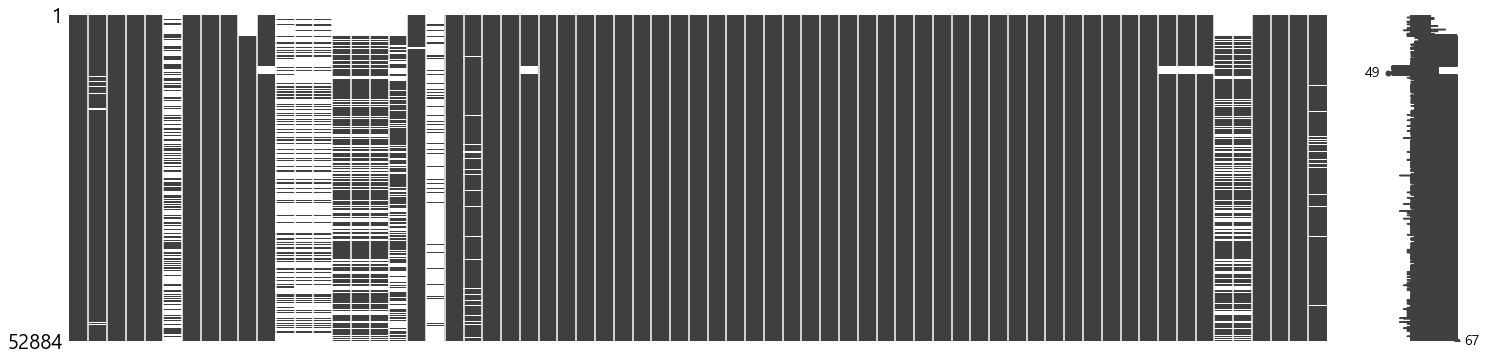

In [30]:
msno.matrix(df, figsize=(25,6))

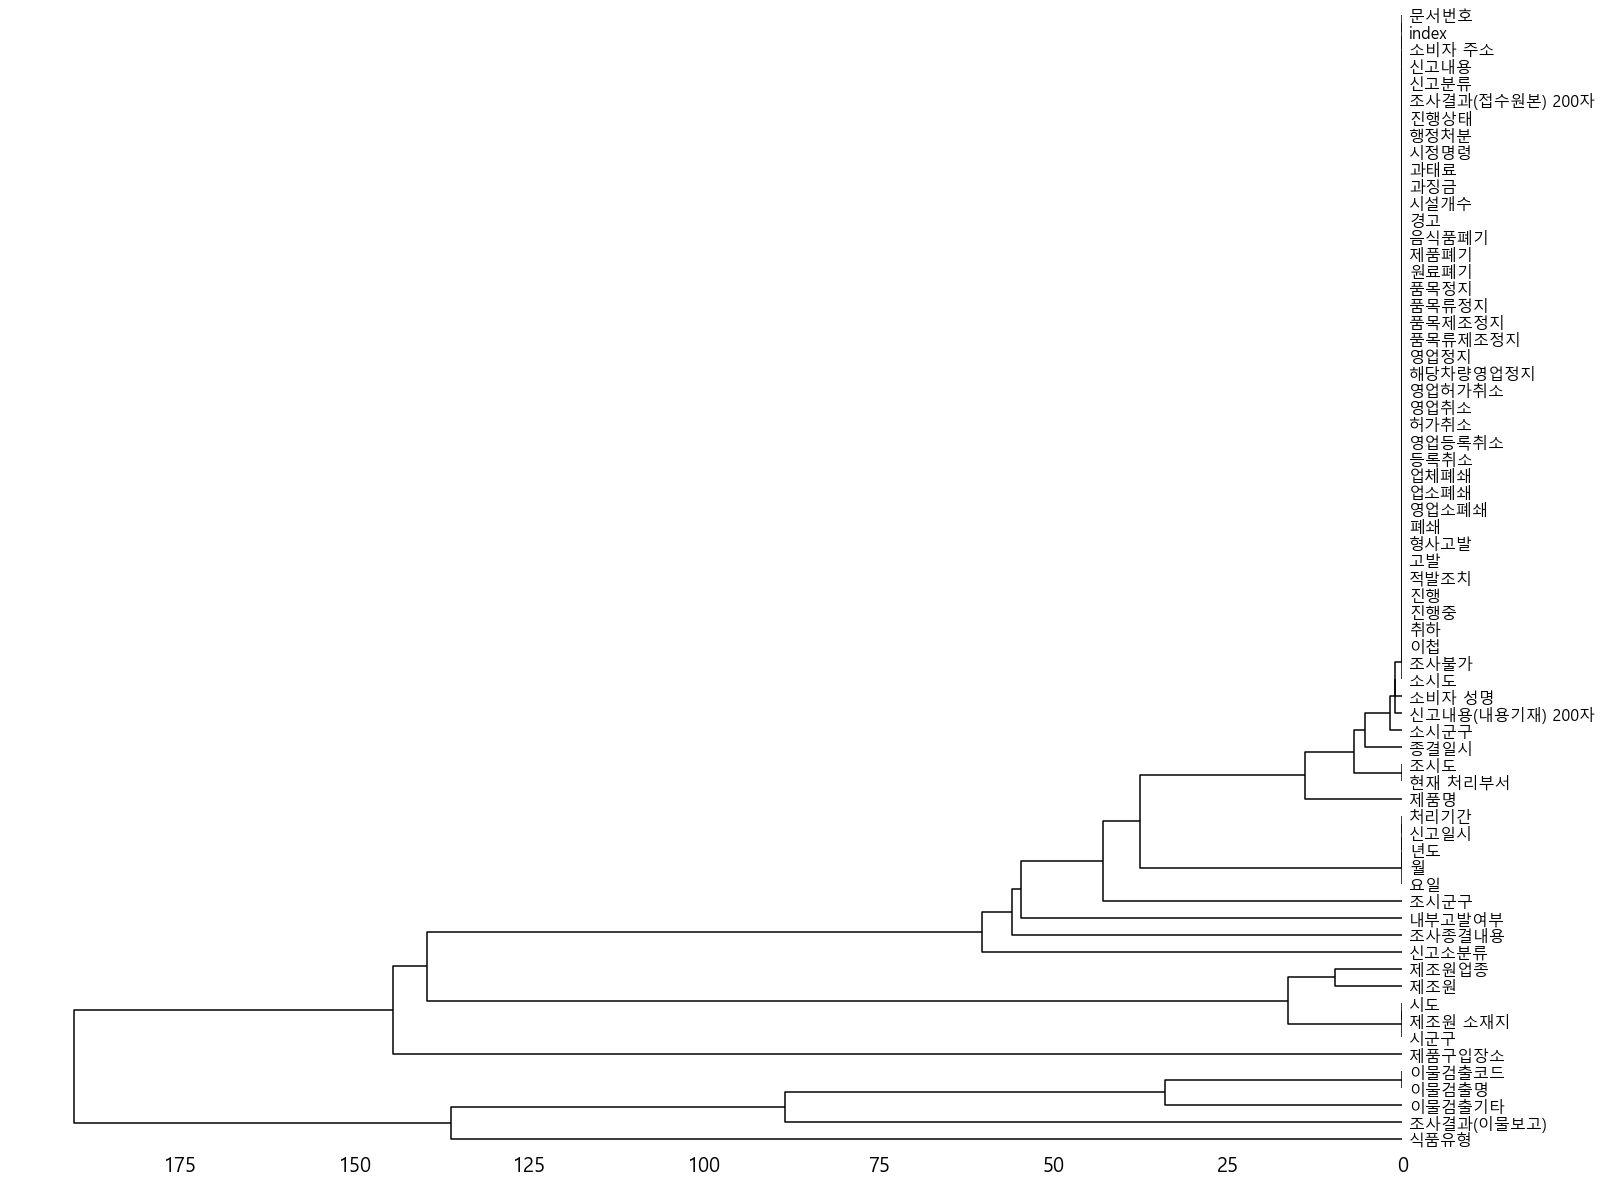

In [31]:
msno.dendrogram(df)